In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

#expected to start up notebook from personal finances on default_p_3
from personalFinances.lib.pifi_backend import * 

# import plotly as py

In [5]:
""" Testing the multi-model generator"""
## TODO: Consider not showing events that don't change anything. like no interest is charged that month
model_sd = datetime.datetime.now() # datetime.datetime(2000, 1, 10, 0, 0) #
model_ed = datetime.datetime(2030, 1, 11, 0, 0)

cc_sd = model_sd
ba_sd = model_sd
salary_sd = datetime.datetime(2017, 7, 1, 0, 0)

cc_ed = model_ed
ba_ed = model_ed
salary_ed = model_ed

cc_i_sd = datetime.datetime(2017, 5, 8, 0, 0)
ba_i_sd = datetime.datetime(2018, 1, 1, 0, 0)


In [7]:
"""Setup SubModels"""
citi_bank = Bank(ba_sd, linked_accounts=[], cost_structure=[ (relativedelta(years=1), 0, ba_ed, [] ), ], 
#         (relativedelta(years=2), 0, datetime.datetime(2021, 1, 10, 0, 0), [] ), 
        model_name="BANK", starting_amount=10000.0, balance_function=lambda x:x*1.0001,
                     interest_start_date=ba_i_sd)

cc = CreditCard(cc_sd, linked_accounts=[citi_bank], cost_structure=[
        #         (relativedelta(months=1), 0 , 1 , []),
        (relativedelta(months=1), -900 , cc_ed, [lambda x, event_date:x if event_date>=cc_i_sd else 0.0]), 
        ], 
        model_name="credit_card", starting_amount=-1000.0, balance_function= lambda x:x*1.16, interest_start_date=cc_i_sd) # 1.16

salary = fin_cause(salary_sd, linked_accounts=[citi_bank], cost_structure=[
    (bi_monthly, 100000/24, salary_ed, [lambda cost:cost]), ],
    model_name="Salary")

###Low versions
citi_bank2 = Bank(ba_sd, linked_accounts=[], cost_structure=[ (relativedelta(years=1), 0, ba_ed, [] ), ], 
#         (relativedelta(years=2), 0, datetime.datetime(2021, 1, 10, 0, 0), [] ), 
        model_name="BANK", starting_amount=10000.0, balance_function=lambda x:x*1.0001,
                     interest_start_date=ba_i_sd)

cc2 = CreditCard(cc_sd, linked_accounts=[citi_bank2], cost_structure=[
        (relativedelta(months=1), -900 , cc_ed, [lambda x, event_date:x if event_date>=cc_i_sd else 0.0]), 
        ],
        model_name="AA_card", starting_amount=-1000.0, balance_function= lambda x:x*1.16, interest_start_date=cc_i_sd) # 1.16


no_salary = fin_cause(salary_sd, linked_accounts=[citi_bank2], cost_structure=[
    (bi_monthly, 0, salary_ed, [lambda cost:cost]), ],
    model_name="Salary")

# , starting_amount=0.0, balance_function= lambda x:x, interest_start_date=None
models = [citi_bank, cc, salary]
low_models = [citi_bank2, cc2, no_salary]

In [8]:
df_low_gen  = fin_mod_gen(low_models, model_ed)
low_income = pd.DataFrame(df_low_gen).set_index("Index").fillna(0)
low_income.head(100)

,CITI_BANK_balance,AA_card_balance,Salary_balance,CITI_BANK_cost,AA_card_cost,Recent Events,Salary_cost
Index,,,,,,,
2017-03-15 00:23:02.281333,7000.0,-3900.000000,0.0,0.0,-900.0,"(CITI_BANK, AA_card)",0.0
2017-04-15 00:23:02.281333,7000.0,-4800.000000,0.0,0.0,-900.0,"(AA_card,)",0.0
2017-05-15 00:23:02.281333,1432.0,-900.000000,0.0,0.0,-900.0,"(AA_card,)",0.0
2017-06-15 00:23:02.281333,388.0,-900.000000,0.0,0.0,-900.0,"(AA_card,)",0.0
2017-07-01 00:00:00.000000,388.0,-900.000000,0.0,0.0,0.0,"(Salary,)",0.0
2017-07-15 00:00:00.000000,388.0,-900.000000,0.0,0.0,0.0,"(Salary,)",0.0
2017-07-15 00:23:02.281333,0.0,-1556.000000,0.0,0.0,-900.0,"(AA_card,)",0.0
2017-08-01 00:00:00.000000,0.0,-1556.000000,0.0,0.0,0.0,"(Salary,)",0.0
2017-08-15 00:00:00.000000,0.0,-1556.000000,0.0,0.0,0.0,"(Salary,)",0.0


In [9]:
"""Setup Main Model"""
df_gen  = fin_mod_gen(models, model_ed)
income = pd.DataFrame(df_gen).set_index("Index").fillna(0)
income.head(100)    

,CITI_BANK_balance,AA_card_balance,Salary_balance,CITI_BANK_cost,AA_card_cost,Recent Events,Salary_cost
Index,,,,,,,
2017-03-15 00:23:02.281333,7000.000000,-3900.0,0.0,0.0,-900.0,"(CITI_BANK, AA_card)",0.000000
2017-04-15 00:23:02.281333,7000.000000,-4800.0,0.0,0.0,-900.0,"(AA_card,)",0.000000
2017-05-15 00:23:02.281333,1432.000000,-900.0,0.0,0.0,-900.0,"(AA_card,)",0.000000
2017-06-15 00:23:02.281333,388.000000,-900.0,0.0,0.0,-900.0,"(AA_card,)",0.000000
2017-07-01 00:00:00.000000,5867.166667,-900.0,0.0,0.0,0.0,"(Salary,)",5479.166667
2017-07-15 00:00:00.000000,11346.333333,-900.0,0.0,0.0,0.0,"(Salary,)",5479.166667
2017-07-15 00:23:02.281333,10302.333333,-900.0,0.0,0.0,-900.0,"(AA_card,)",0.000000
2017-08-01 00:00:00.000000,15781.500000,-900.0,0.0,0.0,0.0,"(Salary,)",5479.166667
2017-08-15 00:00:00.000000,21260.666667,-900.0,0.0,0.0,0.0,"(Salary,)",5479.166667


Index(['CITI_BANK_balance', 'AA_card_balance', 'Salary_balance',
       'CITI_BANK_cost', 'AA_card_cost', 'Recent Events', 'Salary_cost'],
      dtype='object')
['CITI_BANK_balance', 'AA_card_balance', 'Salary_balance']
CITI_BANK_balance


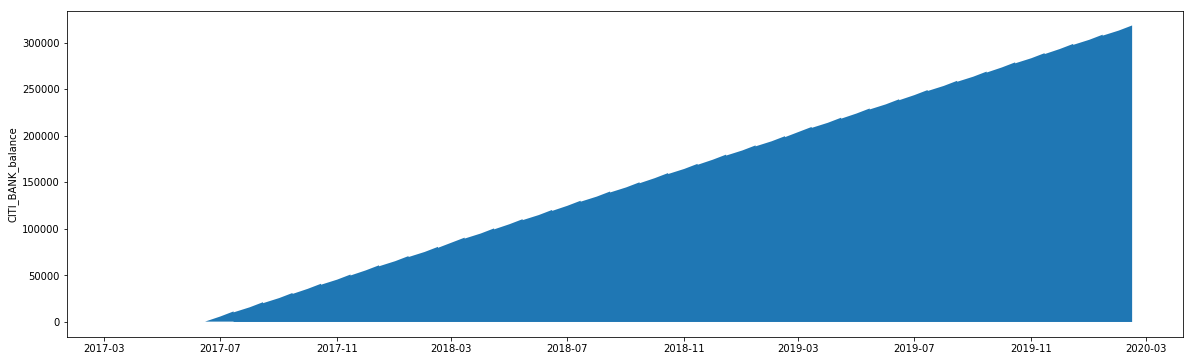

AA_card_balance


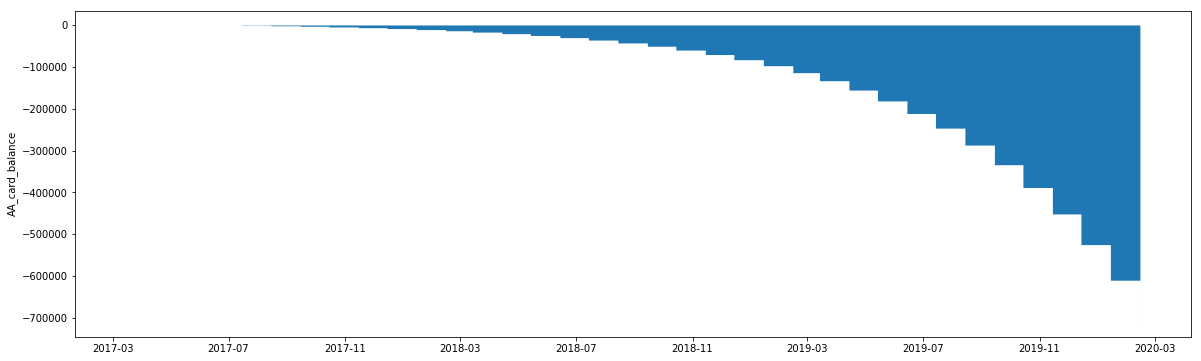

Salary_balance


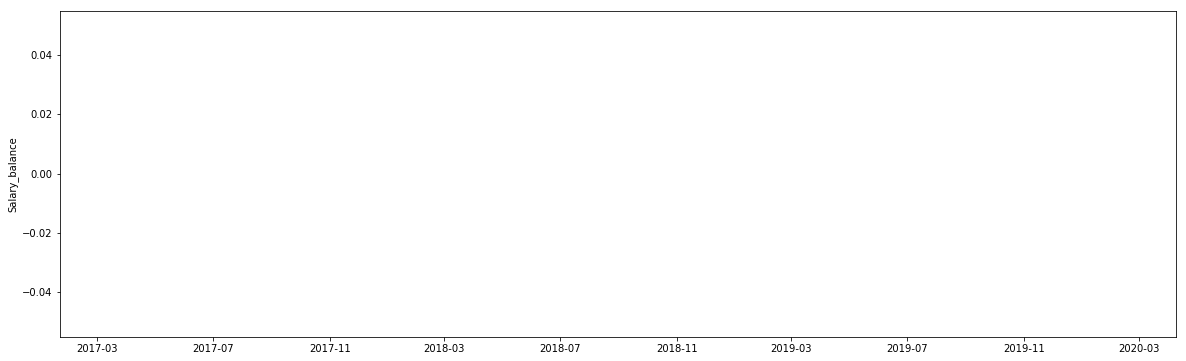

In [11]:
cols = [c for c in income.columns if "balance" in c ]
number_of_events = 100
for c in cols:
    print(c)
    tempx = low_income.index[:number_of_events]
    tempy1 = low_income["{}".format(c)][:number_of_events] #[c]
    tempy2 = income["{}".format(c)][:number_of_events]
    
    fig, temp1 = plt.subplots(figsize=(20, 6))
    temp1.fill_between(tempx, tempy1, tempy2)
    temp1.set_ylabel("{}".format(c))
    plt.show()


-10
a:5, b:-5, c:5


-10
a:15, b:-15, c:-5


10
a:-6, b:6, c:-26


In [ ]:
"""
Links:

http://matplotlib.org/examples/pylab_examples/fill_between_demo.html
http://matplotlib.org/gallery.html
http://matplotlib.org/examples/api/patch_collection.html
http://matplotlib.org/examples/pylab_examples/major_minor_demo2.html
http://matplotlib.org/examples/pylab_examples/psd_demo3.html
http://matplotlib.org/examples/pylab_examples/psd_demo_complex.html


http://pbpython.com/amortization-model-revised.html
https://github.com/MartinPyka/financial_life/graphs/contributors
https://docs.scipy.org/doc/numpy/reference/generated/numpy.pmt.html

https://docs.google.com/spreadsheets/d/1f2F3hDHtP84RUbA68yTX70YyeXk0mMlWAqaCrVOZ3wk/edit#gid=1450323390
"""